In [1]:
import pathlib, copy, re
from itertools import product
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import matplotlib.ticker as mtick
import seaborn as sns
from Bio import Phylo
from elyawy.constants import SUMSTATS_LIST, SUMSTATS_DEFINITION, length_distributions
from elyawy.sparta import Msa

In [3]:
REMOTE_PATH = pathlib.Path("/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun").resolve()
datasets = ["eggnog","yeast"]
total_accuracy = []
for current_data in datasets:
    MAIN_PATH = REMOTE_PATH / current_data
    print(MAIN_PATH)
    if not MAIN_PATH.exists():
        exit(1)

    for dataset in MAIN_PATH.iterdir():
        simulation_results_df = pd.read_csv(dataset / "simulation_results_100_100000.csv")
        classification_accuracy = accuracy_score(simulation_results_df["true_dists"], simulation_results_df["predicted"])

        total_accuracy.append((classification_accuracy, dataset.stem, current_data))

accuracy_df = pd.DataFrame(total_accuracy)

/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/eggnog
/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/yeast


In [4]:
accuracy_df.columns = ["accuracy", "dataset","database"]
# accuracy_df.to_csv("total_accuracy.csv")

In [4]:
accuracy_df = pd.read_csv("total_accuracy.csv", index_col=0)

In [5]:
accuracy_df.query('database == "eggnog"').describe()

,accuracy
count,416.000000
mean,0.981835
std,0.025546
min,0.886667
25%,0.973333
50%,0.996667
75%,1.000000
max,1.000000


In [8]:
accuracy_df.query('database == "eggnog"').describe()

,accuracy
count,416.000000
mean,0.981835
std,0.025546
min,0.886667
25%,0.973333
50%,0.996667
75%,1.000000
max,1.000000


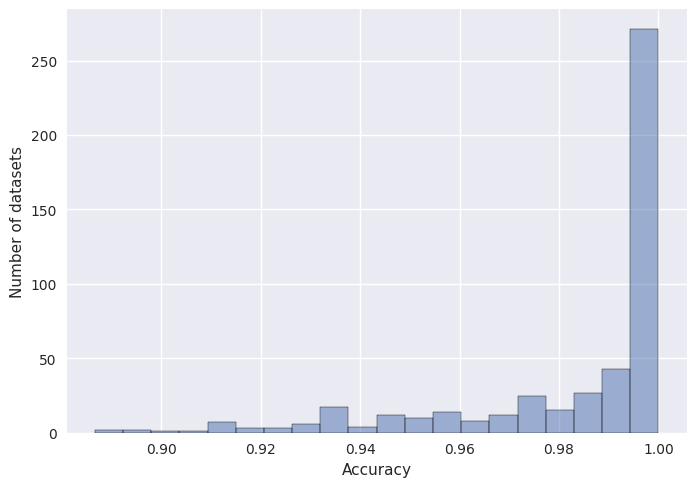

In [14]:
sns.histplot(accuracy_df, legend=False)
plt.ylabel("Number of datasets")
plt.xlabel("Accuracy")
plt.savefig("total_accuracy.svg", dpi=200)
plt.show()

In [30]:
accuracy_df.accuracy.value_counts(normalize=True)

1.000000    0.459627
0.996667    0.101449
0.993333    0.053830
0.990000    0.035197
0.986667    0.031056
0.980000    0.031056
0.976667    0.026915
0.983333    0.024845
0.973333    0.024845
0.960000    0.022774
0.936667    0.018634
0.963333    0.016563
0.933333    0.016563
0.946667    0.012422
0.950000    0.012422
0.970000    0.012422
0.966667    0.012422
0.943333    0.012422
0.913333    0.010352
0.926667    0.008282
0.953333    0.008282
0.940000    0.008282
0.923333    0.006211
0.956667    0.006211
0.910000    0.004141
0.920000    0.004141
0.896667    0.004141
0.930000    0.004141
0.903333    0.002070
0.906667    0.002070
0.890000    0.002070
0.886667    0.002070
0.916667    0.002070
Name: accuracy, dtype: float64